# Data Exploration House Prices

## Installing package

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import houseprices

In [3]:
cd ~/code/arminhazo/houseprices

/home/armin/code/arminhazo/houseprices


In [4]:
pip install houseprices -e .

Obtaining file:///home/armin/code/arminhazo/houseprices
  Installing build dependencies ... done
  Checking if build backend supports build_editable ... done
  Getting requirements to build editable ... done
  Preparing editable metadata (pyproject.toml) ... done
  Building editable for houseprices (pyproject.toml) ... done
  Created wheel for houseprices: filename=houseprices-0.0.0-0.editable-py3-none-any.whl size=2566 sha256=e3ea8ab0fc653a4020f420b84af863ef1938a45b3e292f24577554410c459aa1
  Stored in directory: /tmp/pip-ephem-wheel-cache-n64k5g1y/wheels/56/df/ef/33ec9ccb467d30bb6ce39eb7dc99285a9be737fd26ca69f089
Successfully built houseprices
  Attempting uninstall: houseprices
    Found existing installation: houseprices 0.0.0
    Not uninstalling houseprices at /home/armin/code/arminhazo/houseprices, outside environment /home/armin/.pyenv/versions/3.8.12/envs/housepricesenv
    Can't uninstall 'houseprices'. No files were found to uninstall.
Note: you may need to restart the kernel

## Load data

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [6]:
train_data = pd.read_csv('data/raw/train.csv')

In [7]:
train_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [8]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

### Check feature types numerical vs. categorical

MSSubClass is categorical represented as number
--> change MSSubClass column to object

In [9]:
train_data['MSSubClass'] = train_data['MSSubClass'].astype('object')

In [10]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   object 
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

### Set index and seperate features and target

In [11]:
train_data.set_index('Id', inplace = True)

In [12]:
X = train_data.drop(columns='SalePrice')
y = train_data['SalePrice']

### Reduce number of features

Too many categories for each feature might be too heavy for onehotencoding and model calculation

In [13]:
X.dtypes.value_counts()

object     44
int64      32
float64     3
Name: count, dtype: int64

In [14]:
X.select_dtypes(exclude=['number']).nunique()

MSSubClass       15
MSZoning          5
Street            2
Alley             2
LotShape          4
LandContour       4
Utilities         2
LotConfig         5
LandSlope         3
Neighborhood     25
Condition1        9
Condition2        8
BldgType          5
HouseStyle        8
RoofStyle         6
RoofMatl          8
Exterior1st      15
Exterior2nd      16
MasVnrType        3
ExterQual         4
ExterCond         5
Foundation        6
BsmtQual          4
BsmtCond          4
BsmtExposure      4
BsmtFinType1      6
BsmtFinType2      6
Heating           6
HeatingQC         5
CentralAir        2
Electrical        5
KitchenQual       4
Functional        7
FireplaceQu       5
GarageType        6
GarageFinish      3
GarageQual        5
GarageCond        5
PavedDrive        3
PoolQC            3
Fence             4
MiscFeature       4
SaleType          9
SaleCondition     6
dtype: int64

(array([18., 16.,  4.,  2.,  0.,  2.,  1.,  0.,  0.,  1.]),
 array([ 2. ,  4.3,  6.6,  8.9, 11.2, 13.5, 15.8, 18.1, 20.4, 22.7, 25. ]),
 <BarContainer object of 10 artists>)

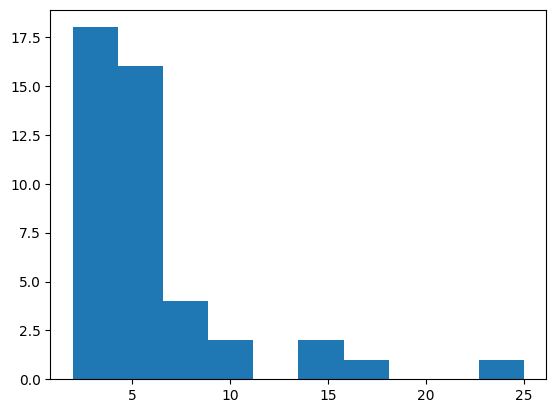

In [15]:
plt.hist(X.select_dtypes(exclude=['number']).nunique())

In [16]:
np.median(X.select_dtypes(exclude=['number']).nunique())

5.0

In [17]:
np.quantile(X.select_dtypes(exclude=['number']).nunique(), q=0.8)

7.399999999999999

Only use features with less than 8 categories

In [18]:
X_cat = X.select_dtypes(exclude=['number'])

In [23]:
X_cat_filtered = X_cat.nunique()[X_cat.nunique() < 8].keys()

In [29]:
X_cat_filtered

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'BldgType', 'RoofStyle', 'MasVnrType',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu',
       'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive',
       'PoolQC', 'Fence', 'MiscFeature', 'SaleCondition'],
      dtype='object')

# Data preparation and training with pipeline

In [21]:
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer
from sklearn.compose import make_column_selector
from sklearn import set_config; set_config(display='diagram')
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import FunctionTransformer

In [31]:
X_cat = X_cat_filtered
X_num = X.select_dtypes(exclude=['object']).keys()

In [35]:
pipe_cat = make_pipeline(SimpleImputer(strategy='most_frequent'),
                         OneHotEncoder(handle_unknown='ignore'))
pipe_num = make_pipeline(SimpleImputer(strategy='mean'),
                         MinMaxScaler())
preproc_baseline = make_column_transformer((X_cat, pipe_cat),
                                           (X_num, pipe_num),
                                           remainder='passthrough')
preproc_baseline

ColumnTransformer(remainder='passthrough',
                  transformers=[('index-1',
                                 Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'BldgType', 'RoofStyle', 'MasVnrType',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical'...
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt',
       'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold'],
      dtype='object'),
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('minmaxscaler',
                                                  MinMaxScaler())]))])

In [36]:
preproc_baseline.fit(X)

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()